In [3]:
from datasets import load_dataset

ds = load_dataset("LDJnr/Puffin")

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'conversations'],
        num_rows: 3000
    })
})

In [7]:
ds['train'].features

{'id': Value(dtype='int64', id=None),
 'conversations': [{'from': Value(dtype='string', id=None),
   'value': Value(dtype='string', id=None)}]}

In [8]:
import pandas as pd

df = pd.read_json("hf://datasets/LDJnr/Puffin/Puffin.jsonl", lines=True)

In [9]:
df.head()

,id,conversations
0,1,"[{'from': 'human', 'value': 'How do I center a..."
1,2,"[{'from': 'human', 'value': 'How does the regu..."
2,3,"[{'from': 'human', 'value': '""How does the pla..."
3,4,"[{'from': 'human', 'value': 'pretend you are a..."
4,5,"[{'from': 'human', 'value': 'What are the key ..."


In [14]:
df['conversations'][2]

[{'from': 'human',
  'value': '"How does the placement of the feet and positioning of the center of gravity affect balance and stability during various physical activities, such as walking or standing on one leg?"'},
 {'from': 'gpt',
  'value': "The placement of the feet and positioning of the center of gravity play crucial roles in maintaining balance and stability during various physical activities, such as walking or standing on one leg. These factors work together to ensure that the body remains upright and stable during movement.\n\n1. Center of Gravity (COG): The center of gravity is the point at which the body's mass is evenly distributed, and it is usually located around the lower part of the spine, near the navel. When the COG is aligned vertically over the base of support (the area between the feet), the body is in a stable position. If the COG shifts outside the base of support, the body becomes unstable and is at risk of falling.\n\n2. Base of Support (BOS): The base of sup

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishanbarpanda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import json

conversations = pd.read_json("hf://datasets/LDJnr/Puffin/Puffin.jsonl", lines=True)

def extract_conversation_text(conversation):
    return ' '.join([turn['value'] for turn in conversation])

conversations['text'] = conversations['conversations'].apply(extract_conversation_text)


'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: d3b2675e-cd37-4e46-af97-d339a478a1bb)')' thrown while requesting GET https://huggingface.co/datasets/LDJnr/Puffin/resolve/main/Puffin.jsonl
Retrying in 1s [Retry 1/5].
'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: a5255b23-6e68-4a98-95fd-ee6f0de073f5)')' thrown while requesting GET https://huggingface.co/datasets/LDJnr/Puffin/resolve/main/Puffin.jsonl
Retrying in 2s [Retry 2/5].


In [101]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(conversations, test_size=0.2, random_state=42)

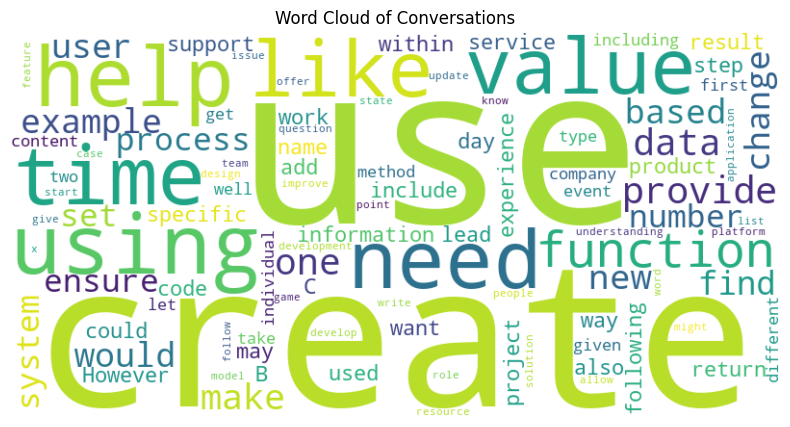

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Combine all conversation texts
all_text = ' '.join(conversations['text'])

# Define stop words
stop_words = set(stopwords.words('english'))

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Conversations')
plt.show()


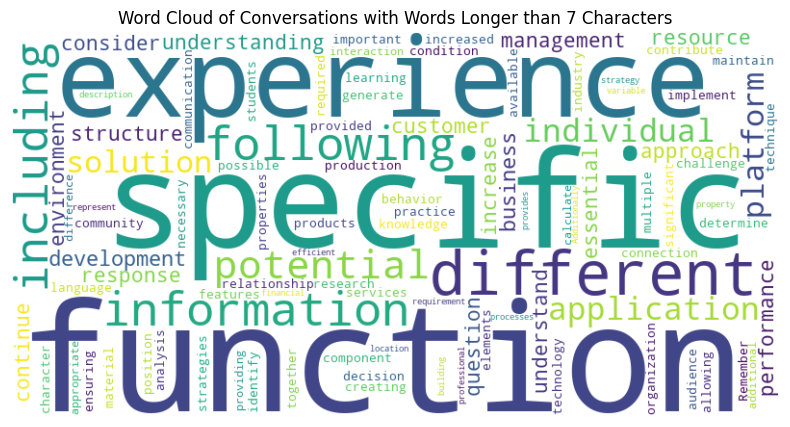

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

# Combine all conversation texts
all_text = ' '.join(conversations['text'])

# Define stop words
stop_words = set(stopwords.words('english'))

# Filter out words with length less than or equal to 7
filtered_words = ' '.join([word for word in re.findall(r'\b\w+\b', all_text) if len(word) > 7])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(filtered_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Conversations with Words Longer than 7 Characters')
plt.show()


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(conversations['text'])
kmeans = KMeans(n_clusters=10, random_state=42)
conversations['cluster'] = kmeans.fit_predict(X)


/Users/ishanbarpanda/PS1/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train['text'])
kmeans = KMeans(n_clusters=10, random_state=42)
train['cluster'] = kmeans.fit_predict(X)


/Users/ishanbarpanda/PS1/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [78]:
import numpy as np

def get_top_terms_per_cluster(tfidf_matrix, labels, terms, n_terms=10):
    df = pd.DataFrame(tfidf_matrix.todense()).groupby(labels).mean()
    for i, r in df.iterrows():
        print(f'\nCluster {i}')
        print(', '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

# Get terms and top terms per cluster
terms = vectorizer.get_feature_names_out()
get_top_terms_per_cluster(X, kmeans.labels_, terms)



Cluster 0
quadratic, sqrt, frac, solve, dx, 4x, cos, 3x, equation, 2x

Cluster 1
string, model, python, return, file, code, import, const, function, data

Cluster 2
hanoi, horizon, rods, goal, step, optimal, state, disks, disk, rod

Cluster 3
project, data, product, content, management, marketing, team, company, business, ai

Cluster 4
dopamine, neuronal, hippocampus, neurotransmitters, synaptic, memory, neural, cognitive, neurons, brain

Cluster 5
parasites, plant, infections, fungal, immune, host, ecosystems, fungi, genetic, species

Cluster 6
center, loop, current, tm, 4π, cm, 10, μ₀, field, magnetic

Cluster 7
green, skillet, salt, oil, rice, minutes, cook, chicken, pepper, cup

Cluster 8
muscle, production, process, force, body, mass, particles, quantum, reaction, energy

Cluster 9
game, let, number, people, player, life, day, 10, like, time


In [103]:
import numpy as np

def get_top_terms_per_cluster(tfidf_matrix, labels, terms, n_terms=10):
    df = pd.DataFrame(tfidf_matrix.todense()).groupby(labels).mean()
    for i, r in df.iterrows():
        print(f'\nCluster {i}')
        print(', '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

# Get terms and top terms per cluster
terms = vectorizer.get_feature_names_out()
get_top_terms_per_cluster(X, kmeans.labels_, terms)



Cluster 0
force, distance, higgs, mass, 10, quantum, particles, field, energy, magnetic

Cluster 1
product, content, design, project, company, marketing, data, business, team, ai

Cluster 2
user, return, string, python, function, data, code, file, import, const

Cluster 3
probability, value, let, equation, 2x, 100, function, player, 10, number

Cluster 4
make, power, just, help, day, people, world, life, time, like

Cluster 5
animal, plant, fungal, protein, host, gene, ecosystems, fungi, genetic, species

Cluster 6
dirac, fourier, frequency, _s, sampled, band, xs, spectrum, sampling, signal

Cluster 7
waste, production, cell, yield, temperature, energy, acid, process, mol, reaction

Cluster 8
glucose, stress, neural, cognitive, memory, body, neurons, blood, cells, brain

Cluster 9
rods, tower, hanoi, optimal, goal, step, state, disks, disk, rod


In [104]:
# conversations['cluster'].value_counts()
train['cluster'].value_counts()

4    663
2    415
3    405
1    372
0    159
5    137
8    135
7     75
9     26
6     13
Name: cluster, dtype: int64

In [105]:
from sklearn.metrics import pairwise_distances_argmin_min

centroids = kmeans.cluster_centers_
distances = pairwise_distances_argmin_min(X, centroids)[1]
print(distances)

[0.98744354 0.98128539 1.00005841 ... 1.0018536  0.9544421  0.94625936]


In [106]:
count = 0
for x in distances:
    if x > 1.0:
        count += 1

print(count)

98


In [131]:
distance_threshold = 1.0  

topic_labels = {
    0: 'Physics and Quantum Mechanics',    
    1: 'Business and Project Management',     
    2: 'Programming and Development',   
    3: 'Mathematics and Probability',         
    4: 'General Life and Philosophy',        
    5: 'Biology and Genetics',               
    6: 'Signal Processing and Fourier Analysis', 
    7: 'Chemical Processes and Reactions',      
    8: 'Neuroscience and Physiology',          
    9: 'Algorithms and Problem Solving'
}
keywords = {
    'Finance': ['finance', 'investment', 'stock', 'stock market', 'economy', 'bank', 'money', 'financial'],
    'Healthcare': ['healthcare', 'hospital', 'doctor', 'medicine', 'medical', 'clinic', 'health'],
    'Therapy' : ['therapy', 'therapist', 'counseling', 'mental health', 'psychology', 'psychiatry'],
    'Content Creation': ['content creation', 'content creator', 'content marketing', 'content strategy', 'content development','instagram', 'youtube', 'tiktok', 'social media'],
    'Gaming': ['gaming', 'game', 'gamer', 'video game', 'esports', 'gaming industry'],
}

def assign_predefined_labels(text, keywords):
    for label, words in keywords.items():
        if any(word in text.lower() for word in words):
            return label
    return 'Misc'

train['topic'] = train['text'].apply(lambda x: assign_predefined_labels(x, keywords))
train.loc[train['topic'] == 'Misc', 'topic'] = train['cluster'].map(topic_labels)

In [132]:
train['topic'].value_counts()

General Life and Philosophy               388
Python Programming and Development        376
Mathematics and Probability               338
Finance                                   285
Healthcare                                238
Business and Project Management           170
Gaming                                    150
Physics and Quantum Mechanics             146
Biology and Genetics                       91
Neuroscience and Physiology                84
Chemical Processes and Reactions           71
Content Creation                           23
Therapy                                    19
Signal Processing and Fourier Analysis     13
Algorithms and Problem Solving              8
Name: topic, dtype: int64

In [86]:
from textblob import TextBlob

# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

conversations['sentiment'] = conversations['text'].apply(get_sentiment)


In [95]:
conversations['sentiment'].value_counts()

positive    2381
negative     575
neutral       44
Name: sentiment, dtype: int64

In [98]:
conversations[['id', 'topic', 'sentiment']]


,id,topic,sentiment
0,1,Python Programming,positive
1,2,Biochemistry and Physiology,positive
2,3,Biochemistry and Physiology,negative
3,4,Business and Project Management,positive
4,5,Business and Project Management,positive
...,...,...,...
2995,2996,Biology and Ecology,positive
2996,2997,Python Programming,negative
2997,2998,Biology and Ecology,positive
2998,2999,General Life and Activities,positive


In [133]:
X_test = vectorizer.transform(test['text'])
test['cluster'] = kmeans.predict(X_test)

# Calculate distances for test data
distances_test = pairwise_distances_argmin_min(X_test, centroids)[1]

# Assign topics based on distance threshold
test['topic'] = test['text'].apply(lambda x: assign_predefined_labels(x, keywords))
test.loc[test['topic'] == 'Misc', 'topic'] = test['cluster'].map(topic_labels)


In [134]:
test.head(10)

,id,conversations,text,cluster,topic,sentiment
1801,1802,"[{'from': 'human', 'value': 'You will act as a...",You will act as a consultant for tech product ...,1,Business and Project Management,positive
1190,1191,"[{'from': 'human', 'value': 'What is Lectio Di...","What is Lectio Divina? Lectio Divina, which tr...",4,General Life and Philosophy,positive
1817,1818,"[{'from': 'human', 'value': 'Invent a new play...",Invent a new playable character in The Binding...,4,Healthcare,positive
251,252,"[{'from': 'human', 'value': 'How can interfere...",How can interference fringes be used to calcul...,0,Physics and Quantum Mechanics,positive
2505,2506,"[{'from': 'human', 'value': 'Can you write a r...",Can you write a resume for anesthesiologist te...,4,Healthcare,positive
1117,1118,"[{'from': 'human', 'value': 'How do you most e...",How do you most effectively achieve a Mythic r...,1,Content Creation,positive
1411,1412,"[{'from': 'human', 'value': 'How you would you...",How you would you lay out a pitch deck to get ...,1,Finance,positive
2113,2114,"[{'from': 'human', 'value': 'How does the body...",How does the body position affect the biomecha...,8,Neuroscience and Physiology,positive
408,409,"[{'from': 'human', 'value': 'Write a story abo...",Write a story about a brunet prince named Fern...,4,General Life and Philosophy,positive
2579,2580,"[{'from': 'human', 'value': 'Photosynthesis is...",Photosynthesis is a vital process for life on ...,0,Physics and Quantum Mechanics,positive


In [130]:
test['conversations'][1117]

[{'from': 'human',
  'value': 'How do you most effectively achieve a Mythic ranking on MTGA?'},
 {'from': 'gpt',
  'value': "Achieving a Mythic ranking in Magic: The Gathering Arena (MTGA) is a challenging and rewarding goal. To increase your chances of reaching this prestigious rank, follow these steps:\n\n1. Learn the fundamentals: Make sure you have a strong understanding of the game's basic mechanics, such as card types, phases, and interactions. This will help you make better decisions during gameplay.\n2. Keep up-to-date with the meta: Stay informed about the current metagame, including popular decks, strategies, and card interactions. This knowledge will help you anticipate what your opponents may be playing and how to counter their strategies.\n3. Choose a competitive deck: Select a deck that is well-suited for the current meta and has a proven track record of success. You can find deck lists on websites like MTG Goldfish or from successful streamers and content creators. Pract

In [135]:
import joblib

# Save the trained model
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']